In [1]:
# We're performing customer segmentation on specific groups of mall customers, identifying the best possible
#    cluster using KMeans unsupervised machine learning algorithm to find the univariate, bivariate and multivariate clusters.
# Once these clusters are identified, we can apply summary statistics to identify the best marketing group to different campaings.

# First, let's import the packages we will use in this project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# we can ignore warnings about package versions
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Now we need to read in the data
df = pd.read_csv("C:/Users/valer/OneDrive/Documentos/Mall_Customers.csv")

In [3]:
# Let's take a look at the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

In [4]:
# Checking summary statistics on the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


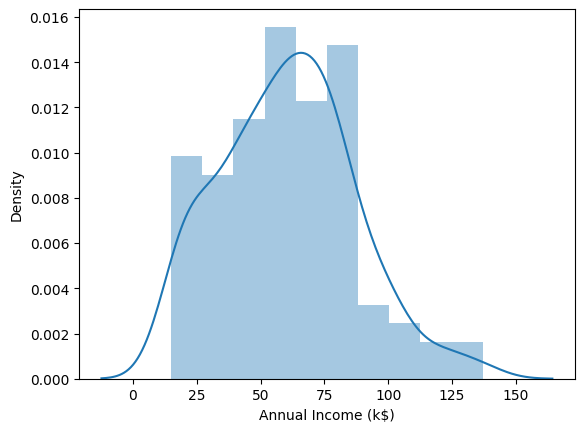

In [5]:
# Histogram for a better look at the income distribution
sns.distplot(df['Annual Income (k$)']);

In [6]:
# Let's check the other columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

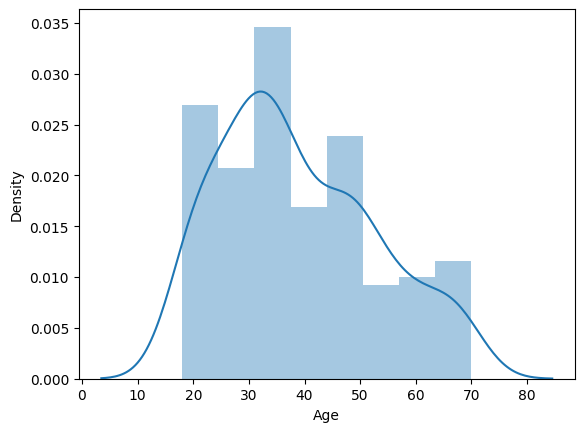

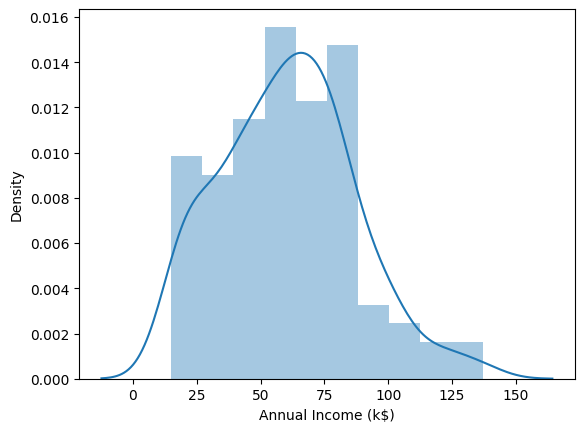

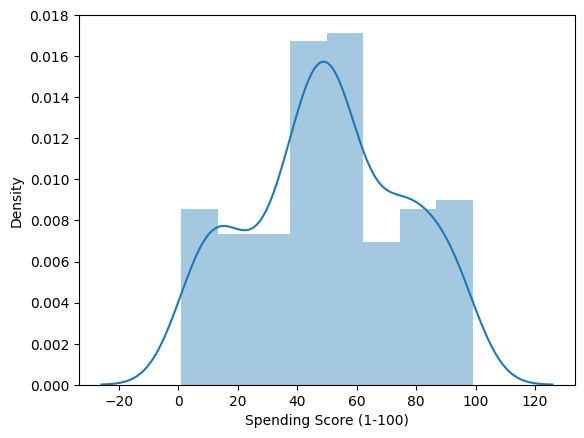

In [7]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns: 
    plt.figure();
    sns.distplot(df[i]);

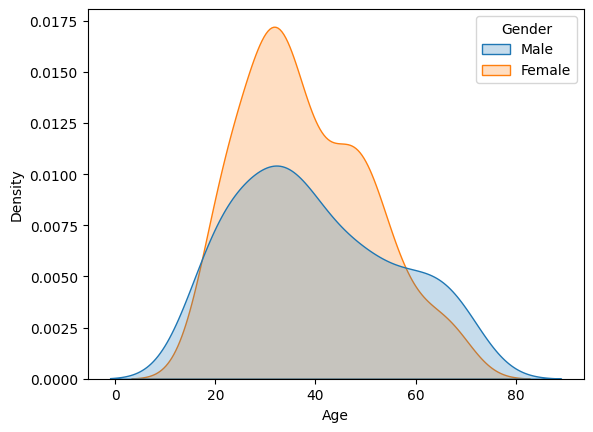

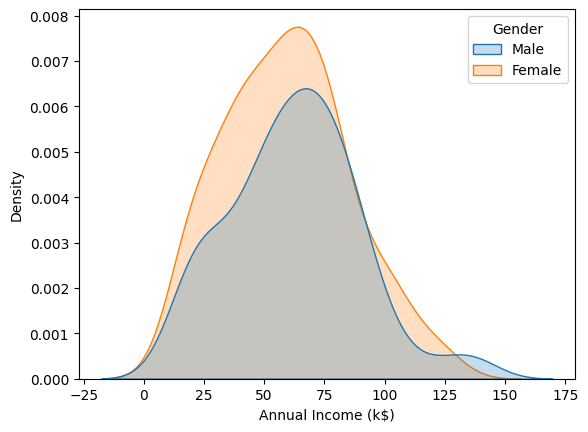

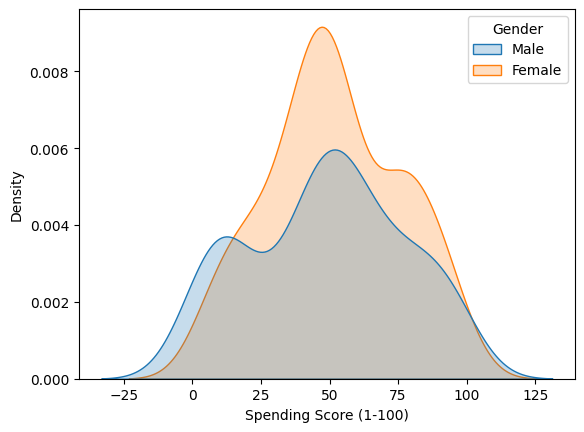

In [8]:
# We can also visualize our variables comparing by gender
# this is possible by bringing in kdeplot using a different parameter to separate the visuals with hue
for i in columns: 
    plt.figure();
    sns.kdeplot(x=df[i], hue=df['Gender'], fill=True);

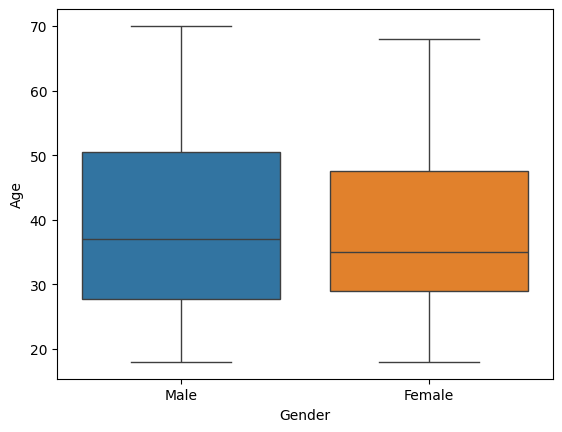

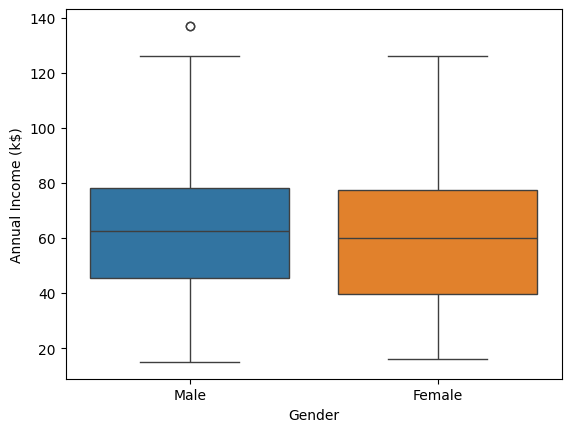

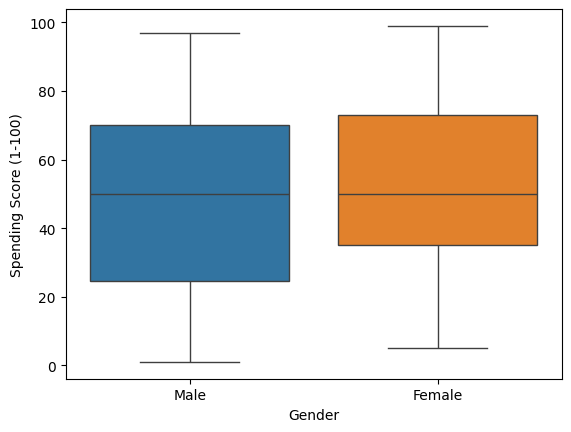

In [9]:
# We can also describe our data statistically using boxplots
#    an example is the outlier shown in the annual income plot 
#    against the 'big' tail shown above in the histogram of the same column
for i in columns: 
    plt.figure();
    sns.boxplot(df, x='Gender', y=df[i], hue=df['Gender']);

In [10]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

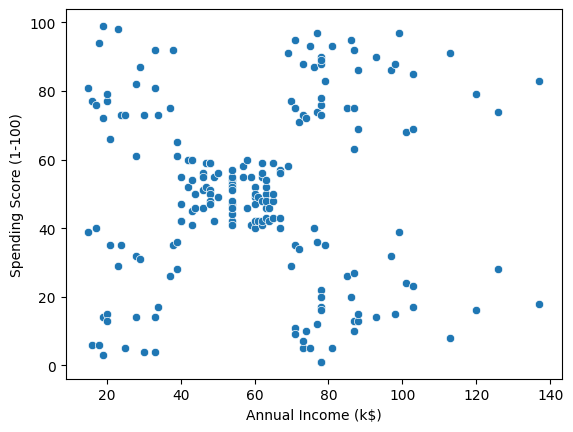

In [11]:
# For Bivariate analysis we bring in two variables on our visuals to better understand the data
sns.scatterplot(df, x='Annual Income (k$)', y='Spending Score (1-100)')

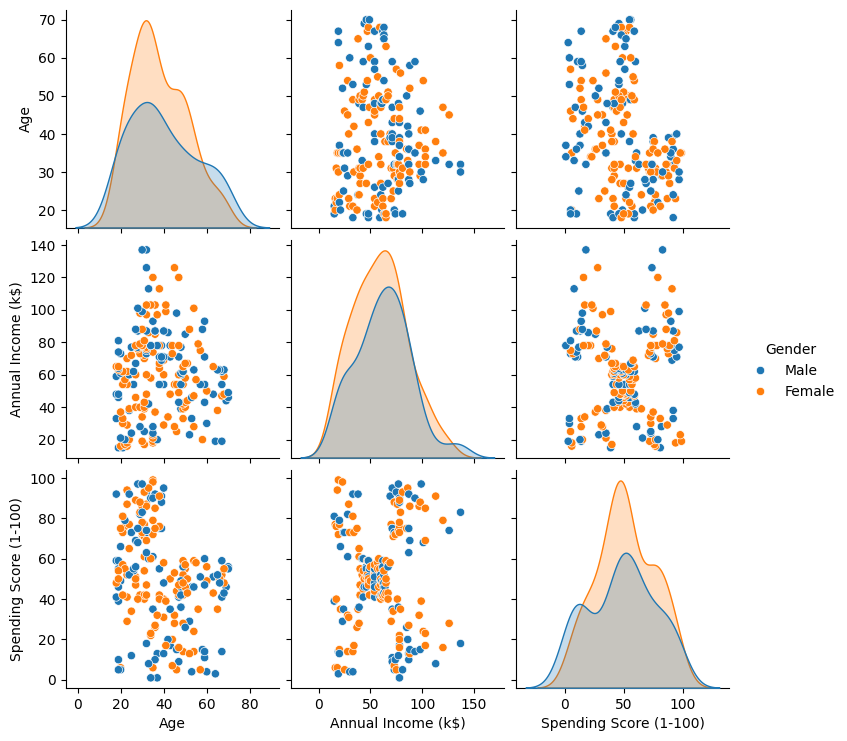

In [12]:
# We can also pair our variables and separate the visuals by gender
# We drop customerID, as there it has no value on our data interpretation
# There's advantage to look at annual income and spending score to identify market groups
df=df.drop('CustomerID', axis=1)
sns.pairplot(df, hue='Gender')

In [13]:
df.groupby(['Gender']).mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
# We can also check the correlation between our variables
df=df.drop('Gender', axis=1)
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

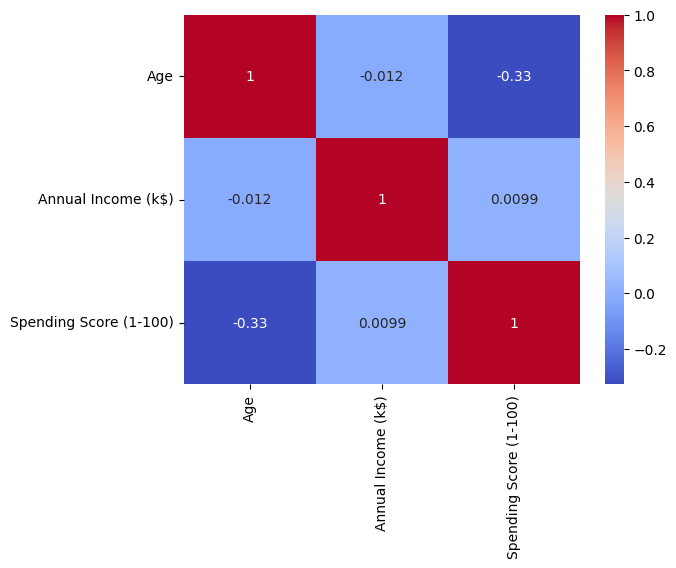

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Clustering - Univariate, Bivariate, Multivariate

In [16]:
df = pd.read_csv("C:/Users/valer/OneDrive/Documentos/Mall_Customers.csv")
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
# Let's initiate our kmeans algorithm (the default cluster# is 8, we use the default to fit our data
#    and using the inertia and the elbow method we can choose the right # of clusters to use)
# --> Fit our data to the algorithm --> predict 
# For the univariate clustering, we will be looking only at the annual income
clustering1 = KMeans(3)
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [18]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
# add the labels to our data
df['Income Cluster'] = clustering1.labels_

In [20]:
df['Income Cluster'].value_counts()

Income Cluster
2    90
1    74
0    36
Name: count, dtype: int64

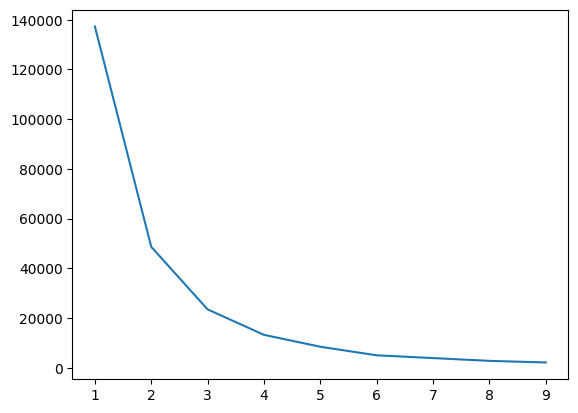

In [21]:
inertia_scores = []
for i in range(1,10):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
plt.plot(range(1,10), inertia_scores)

In [22]:
df.groupby('Income Cluster')['Age'].mean()

Income Cluster
0    37.833333
1    39.500000
2    38.722222
Name: Age, dtype: float64

In [23]:
df.groupby('Income Cluster')['Annual Income (k$)'].mean()

Income Cluster
0    99.888889
1    33.486486
2    67.088889
Name: Annual Income (k$), dtype: float64

### Bivariate Clustering

In [24]:
# Similar to the previous analysis, we want to check annual income and spending score
clustering2 = KMeans(5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
inertia_scores2 = []
for i in range(1,10):
    kmeans2= KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

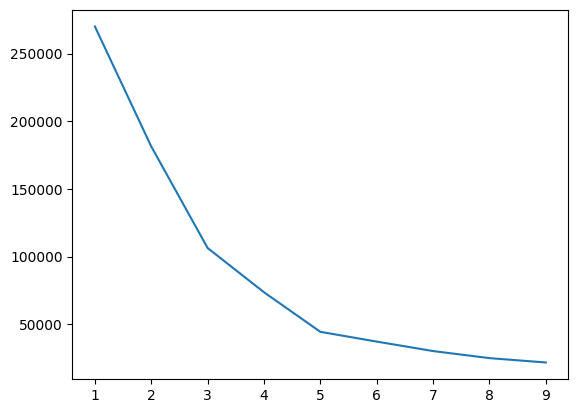

In [25]:
plt.plot(range(1,10), inertia_scores2)

In [26]:
# Adding a center to our clusters
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

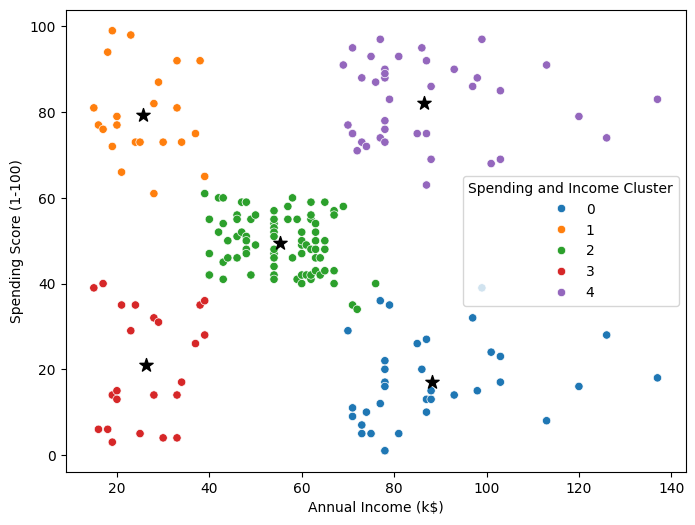

In [27]:
# Choosing the elbow aroung 5 from the plot above, we can now separate our visual, bringing in hue again to separate our clusters by color
plt.figure(figsize=(8,6))
sns.scatterplot(df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette= 'tab10')
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
plt.savefig('Clustering_Bivariate.png')

In [28]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.590909,0.409091
2,0.592593,0.407407
3,0.608696,0.391304
4,0.538462,0.461538


In [29]:
#dfcheck=df.drop(['Gender', 'CustomerID', 'Income Cluster'], axis=1)
#dfcheck.groupby('Spending and Income Cluster').mean()

Cluster #4 has a high income/high spending profile and it could be useful to plan a campaing that targets popular high profile items in this cluster.
On the other hand, cluster #1 has a low income/high spending profile where an interesting opporunity would be to market these customers for sales events.

### Multivariate clustering

In [30]:
# This will allow to scale our data
from sklearn.preprocessing import StandardScaler

In [31]:
# Initializing sklearn
scale = StandardScaler()

In [32]:
#df = pd.read_csv("C:/Users/valer/OneDrive/Documentos/Mall_Customers.csv")
# turning gender into binary values (we don't need both Gender_Female and Gender_Male, as they will be opposite from each other)
dff= pd.get_dummies(df, drop_first=True)

In [33]:
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,3,True
1,2,21,15,81,1,1,True
2,3,20,16,6,1,3,False
3,4,23,16,77,1,1,False
4,5,31,17,40,1,3,False


In [34]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [35]:
# Transforming our data
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


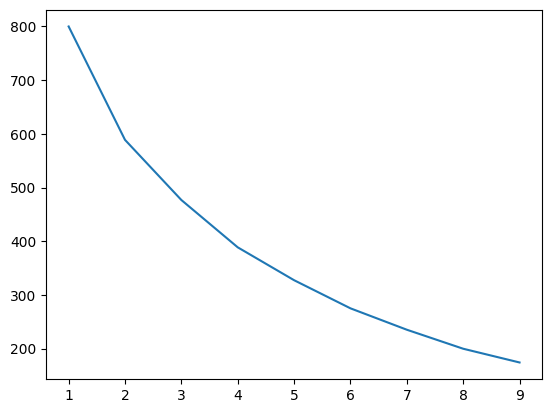

In [36]:
# Similar to previous analysis, we pass our new dff 
inertia_scores3 = []
for i in range(1,10):
    kmeans3= KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,10), inertia_scores3)

In [37]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,4
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,0,4
198,199,Male,32,137,18,0,0


In [38]:
df.to_csv('Clustering.csv')